In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from vincentnet.neural_net import NeuralNetwork

import mnist

import pickle

In [3]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28))).astype(np.uint8)
    plt.imshow(two_d, cmap='gray')
    return plt

In [4]:
images, labels = mnist.train_images().reshape(-1, 28*28), mnist.train_labels()
test_images, test_labels = mnist.test_images().reshape(-1, 28*28), mnist.test_labels()

X = np.array(images)
X_std = X.std()
X_mean = X.mean()
X = (X - X_mean) / X_std

y = np.array(labels)

X_test = (np.array(test_images) - X_mean) / X_std
y_test = np.array(test_labels)

In [5]:
X_train = X[:55000]
X_validation = X[55000:]

y_train = y[:55000]
y_validation = y[55000:]

In [6]:
nn = NeuralNetwork(D=784, k=10, layers=[300, 150, 50], step_size = .001, reg = .01)
batch_size = 264
s = 0
training_info = []

In [7]:
for s in range(s, 1000001):
    batch = np.array(range(batch_size*s, batch_size*s+batch_size))%X_train.shape[0]
    l = nn.step(X_train[batch, :], y_train[batch])
    
    if s%50000==0:
        print('Loss at step {}: {}'.format(s, l))
        nn.step_size = max(nn.step_size*.99, .00001)
        training_info.append({'loss': l,
                              'step': s,
                              'train_accuracy': nn.get_accuracy(X_train, y_train),
                              'validation_accuracy': nn.get_accuracy(X_validation, y_validation)})

Loss at step 0: 2.4468256893063836
Loss at step 50000: 2.352600788602715
Loss at step 100000: 2.3165778455914303
Loss at step 150000: 2.3005619941542883
Loss at step 200000: 4.01731370125729
Loss at step 250000: nan
Loss at step 300000: nan
Loss at step 350000: nan
Loss at step 400000: nan
Loss at step 450000: nan
Loss at step 500000: nan
Loss at step 550000: nan
Loss at step 600000: nan
Loss at step 650000: nan
Loss at step 700000: nan
Loss at step 750000: nan
Loss at step 800000: nan
Loss at step 850000: nan
Loss at step 900000: nan
Loss at step 950000: nan
Loss at step 1000000: nan


In [9]:
train_df = pd.DataFrame(training_info).sort_values('step')

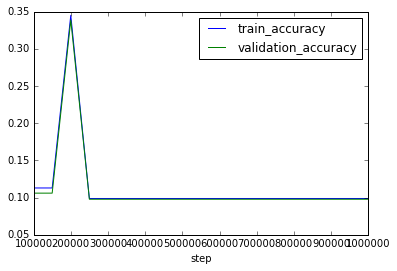

In [10]:
(train_df.set_index('step')[['train_accuracy', 'validation_accuracy']]
 .query('step > 50000')
 .plot())

### Inspect the Errors

In [11]:
preds = nn.predict(X_test)
v = enumerate(zip(preds, y_test))

Index 0: Model thought 7 was 0


<module 'matplotlib.pyplot' from '/home/vincentstigliani/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

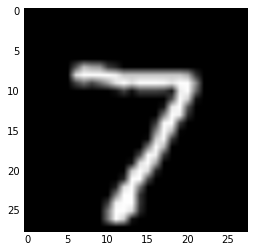

In [12]:
a,b,c = next((i, x, y) for i, (x,y) in v if x!=y)
print('Index {}: Model thought {} was {}'.format(a, c, b))
gen_image(test_images[a])

Index 1: Model thought 2 was 0


<module 'matplotlib.pyplot' from '/home/vincentstigliani/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

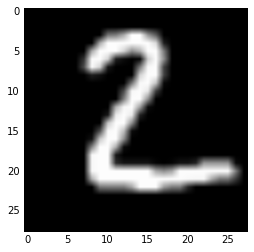

In [13]:
a,b,c = next((i, x, y) for i, (x,y) in v if x!=y)
print('Index {}: Model thought {} was {}'.format(a, c, b))
gen_image(test_images[a])

Index 2: Model thought 1 was 0


<module 'matplotlib.pyplot' from '/home/vincentstigliani/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

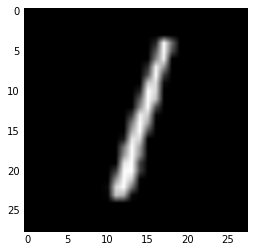

In [14]:
a,b,c = next((i, x, y) for i, (x,y) in v if x!=y)
print('Index {}: Model thought {} was {}'.format(a, c, b))
gen_image(test_images[a])

Index 4: Model thought 4 was 0


<module 'matplotlib.pyplot' from '/home/vincentstigliani/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

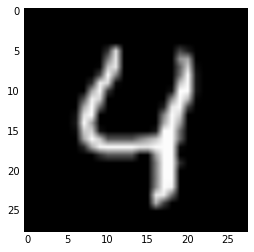

In [15]:
a,b,c = next((i, x, y) for i, (x,y) in v if x!=y)
print('Index {}: Model thought {} was {}'.format(a, c, b))
gen_image(test_images[a])

Index 5: Model thought 1 was 0


<module 'matplotlib.pyplot' from '/home/vincentstigliani/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

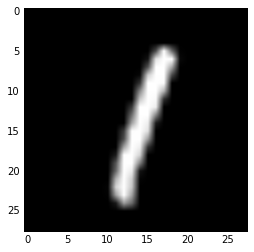

In [16]:
a,b,c = next((i, x, y) for i, (x,y) in v if x!=y)
print('Index {}: Model thought {} was {}'.format(a, c, b))
gen_image(test_images[a])

Index 6: Model thought 4 was 0


<module 'matplotlib.pyplot' from '/home/vincentstigliani/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

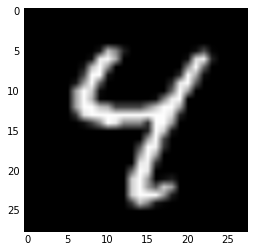

In [17]:
a,b,c = next((i, x, y) for i, (x,y) in v if x!=y)
print('Index {}: Model thought {} was {}'.format(a, c, b))
gen_image(test_images[a])

Index 7: Model thought 9 was 0


<module 'matplotlib.pyplot' from '/home/vincentstigliani/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

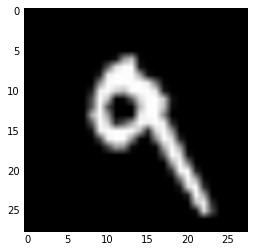

In [18]:
a,b,c = next((i, x, y) for i, (x,y) in v if x!=y)
print('Index {}: Model thought {} was {}'.format(a, c, b))
gen_image(test_images[a])

In [19]:
pickle.dump(nn, open('nn_300_step_size_001_reg_01.pkl', 'wb'))

In [20]:
nn = NeuralNetwork(D=784, k=10, layers=[50, 200], step_size = .001, reg = .001)
batch_size = 264
s = 0
training_info = []

In [21]:
for s in range(s, 1000001):
    batch = np.array(range(batch_size*s, batch_size*s+batch_size))%X_train.shape[0]
    l = nn.step(X_train[batch, :], y_train[batch])
    
    if s%50000==0:
        print('Loss at step {}: {}'.format(s, l))
        nn.step_size = max(nn.step_size*.99, .00001)
        training_info.append({'loss': l,
                              'step': s,
                              'train_accuracy': nn.get_accuracy(X_train, y_train),
                              'validation_accuracy': nn.get_accuracy(X_validation, y_validation)})

Loss at step 0: 2.304967861841018
Loss at step 50000: 0.27206500406614437
Loss at step 100000: 0.2054239235147836
Loss at step 150000: 0.18826244328306296
Loss at step 200000: 0.17157394436660722
Loss at step 250000: 0.15719874389680977
Loss at step 300000: 0.14749214695226504
Loss at step 350000: 0.13993530300745946
Loss at step 400000: 0.13361908820600737
Loss at step 450000: 0.1288519775605099
Loss at step 500000: 0.12475086726553865
Loss at step 550000: 0.12204008967524099
Loss at step 600000: 0.1197666971119095
Loss at step 650000: 0.11814530862210576
Loss at step 700000: 0.11702739600118026
Loss at step 750000: 0.11602807090660272
Loss at step 800000: 0.11519795469752424
Loss at step 850000: 0.11464752193557061
Loss at step 900000: 0.1142965678270797
Loss at step 950000: 0.11396449678046865
Loss at step 1000000: 0.11384584120699902


In [23]:
pickle.dump(nn, open('nn_50_200_step_size_001_reg_001.pkl', 'wb'))

In [24]:
nn = NeuralNetwork(D=784, k=10, layers=[200, 75], step_size = .001, reg = .001)
batch_size = 264
s = 0
training_info = []

In [30]:
for s in range(s, 1000001):
    batch = np.array(range(batch_size*s, batch_size*s+batch_size))%X_train.shape[0]
    l = nn.step(X_train[batch, :], y_train[batch])
    
    if s%50000==0:
        print('Loss at step {}: {}'.format(s, l))
        nn.step_size = max(nn.step_size*.99, .00001)
        training_info.append({'loss': l,
                              'step': s,
                              'train_accuracy': nn.get_accuracy(X_train, y_train),
                              'validation_accuracy': nn.get_accuracy(X_validation, y_validation)})

Loss at step 150000: 0.1399890417508967
Loss at step 200000: 0.1296412854948494
Loss at step 250000: 0.12055270021520079
Loss at step 300000: 0.11315781742501571
Loss at step 350000: 0.10698441067926437
Loss at step 400000: 0.10232532317361764
Loss at step 450000: 0.0988458671842573
Loss at step 500000: 0.09630564865734927
Loss at step 550000: 0.09433201894534003
Loss at step 600000: 0.09281553402740723
Loss at step 650000: 0.09167391362370479
Loss at step 700000: 0.09076752417956672
Loss at step 750000: 0.08995522527054858
Loss at step 800000: 0.08930027116507712
Loss at step 850000: 0.0887560486311191
Loss at step 900000: 0.08835659985390551
Loss at step 950000: 0.08799511168417927
Loss at step 1000000: 0.08770934643520727


In [ ]:
pickle.dump(nn, open('nn_200_75_step_size_001_reg_001.pkl', 'wb'))

In [32]:
train_df = pd.DataFrame(training_info).sort_values('step')
train_df.tail()

,loss,step,train_accuracy,validation_accuracy
16,0.089300,800000,0.999255,0.9820
17,0.088756,850000,0.999327,0.9820
18,0.088357,900000,0.999364,0.9822
19,0.087995,950000,0.999400,0.9820
20,0.087709,1000000,0.999455,0.9818


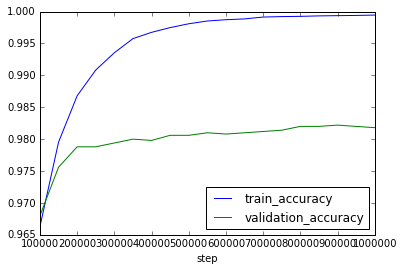

In [34]:
(train_df.set_index('step')[['train_accuracy', 'validation_accuracy']]
 .query('step > 50000')
 .plot())

In [35]:
nn.get_accuracy(X_test, y_test)

0.9778

In [36]:
preds = nn.predict(X_test)
v = enumerate(zip(preds, y_test))

Index 149: Model thought 2 was 5


<module 'matplotlib.pyplot' from '/home/vincentstigliani/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

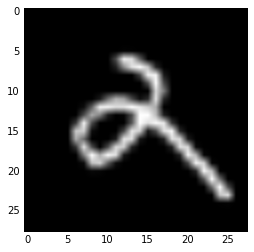

In [37]:
a,b,c = next((i, x, y) for i, (x,y) in v if x!=y)
print('Index {}: Model thought {} was {}'.format(a, c, b))
gen_image(test_images[a])

Index 247: Model thought 4 was 2


<module 'matplotlib.pyplot' from '/home/vincentstigliani/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

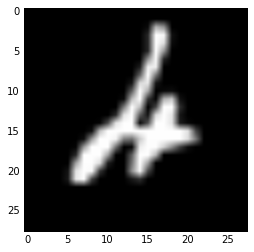

In [38]:
a,b,c = next((i, x, y) for i, (x,y) in v if x!=y)
print('Index {}: Model thought {} was {}'.format(a, c, b))
gen_image(test_images[a])

Index 259: Model thought 6 was 0


<module 'matplotlib.pyplot' from '/home/vincentstigliani/anaconda3/lib/python3.5/site-packages/matplotlib/pyplot.py'>

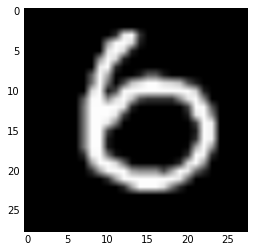

In [39]:
a,b,c = next((i, x, y) for i, (x,y) in v if x!=y)
print('Index {}: Model thought {} was {}'.format(a, c, b))
gen_image(test_images[a])